<a href="https://colab.research.google.com/github/shabu43/TeleCustomer_Churn/blob/main/TeleCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brief overview of the project goals:**

*  Predicting customer churn using machine learning models.
*  Segmenting customers to gain insights into behavior and churn risk.
* Supporting telecom companies in developing data-driven retention strategies.





In [2]:
import pandas as pd
mydata = pd.read_csv( "/content/drive/MyDrive/Colab Notebooks/database/Telecom_customer.csv" )
mydata.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
mydata.isnull().sum()
mydata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID is unique and not relevant for the churn.

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# all categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Encoding categorical features using OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_categorical = encoder.fit_transform(mydata[categorical_features])


# Encoding the target variable
y = mydata['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Perform Chi-square test
chi_scores, p_values = chi2(X_categorical, y)

# Prepare the results in a dataframe
chi_square_results = pd.DataFrame({
    'Feature': encoder.get_feature_names_out(categorical_features),
    'Chi2 Score': chi_scores,
    'P-Value': p_values
})

# Sort the results by p-value
chi_square_results_sorted = chi_square_results.sort_values(by='P-Value', ascending=True)

# Display the most significant features
#print(chi_square_results_sorted)

# Filter features with p-value > 0.05 (insignificant features)
insignificant_features = chi_square_results_sorted[chi_square_results_sorted['P-Value'] > 0.05]

# Display the insignificant features
print("\nAll Insignificant features")
print(insignificant_features)


All Insignificant features
                          Feature  Chi2 Score   P-Value
5  MultipleLines_No phone service    0.907148  0.340872
0                     gender_Male    0.258699  0.611016
4                PhoneService_Yes    0.097261  0.755142


In [ ]:
from sklearn.feature_selection import f_classif

# List of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Handle any missing or invalid values in TotalCharges by converting them to numeric (if necessary)
mydata['TotalCharges'] = pd.to_numeric(mydata['TotalCharges'], errors='coerce')
mydata = mydata.dropna(subset=numerical_features)  # Drop rows with missing numerical values

# Extract the target variable (Churn)
y = mydata['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Extract the numerical features for the ANOVA test
X_numerical = mydata[numerical_features]

# Perform the ANOVA test (f_classif)
f_scores, p_values = f_classif(X_numerical, y)

# Create a dataframe to display the ANOVA results
anova_results = pd.DataFrame({
    'Feature': numerical_features,
    'F-Score': f_scores,
    'P-Value': p_values
})

# Sort by P-Value to see the most significant features
anova_results_sorted = anova_results.sort_values(by='P-Value')

# Display the sorted ANOVA results
print("All Sorted results by P-value")
print(anova_results_sorted)

# Filter features with p-value > 0.05 (significant features)
significant_features = anova_results_sorted[anova_results_sorted['P-Value'] <= 0.05]

# Display the insignificant features
print("\nAll Significant features")
print(significant_features)

All Sorted results by P-value
          Feature      F-Score        P-Value
0          tenure  1007.509431  9.437650e-207
2    TotalCharges   291.344862   4.876866e-64
1  MonthlyCharges   271.576990   6.760843e-60

All Significant features
          Feature      F-Score        P-Value
0          tenure  1007.509431  9.437650e-207
2    TotalCharges   291.344862   4.876866e-64
1  MonthlyCharges   271.576990   6.760843e-60


**Chi-Square** and **ANOVA** tests revealed that features like *‘Monthly Charges’ and ‘Tenure’* significantly impact churn prediction, while features with p-values above 0.05, such as *‘Senior Citizen,’* were excluded to avoid overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

mydata = mydata.drop(columns=['MultipleLines_No phone service', 'gender_Male', 'PhoneService_Yes'], errors='ignore')
# Assuming 'Churn' is the target variable and relevant features are selected
X = mydata.drop('Churn', axis=1)  # Replace 'Churn' with the actual target column name
y = mydata['Churn']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Drop non-numerical columns before scaling, in this case 'customerID'
X = X.drop('customerID', axis=1)
categorical_cols = categorical_cols.drop('customerID') # Update categorical columns after dropping 'customerID'

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Handle unknown categories during testing

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data (scale numerical and one-hot encode categorical)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("-" * 30)


Model: Logistic Regression
Accuracy: 0.7874911158493249
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

------------------------------
Model: Decision Tree
Accuracy: 0.7164179104477612
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.79      0.80      1033
         Yes       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407

------------------------------
Model: Random Forest
Accuracy: 0.7803837953091685
Classification Report:
              precision    recall  f1-score   support

    

**Logistic Regression** and **Random Forest** classifiers showed comparable performance, with **Random Forest** achieving a slightly higher F1-score of 0.82 after hyperparameter tuning. **Decision Trees**, while interpretable, **performed less** consistently due to overfitting on the training data.

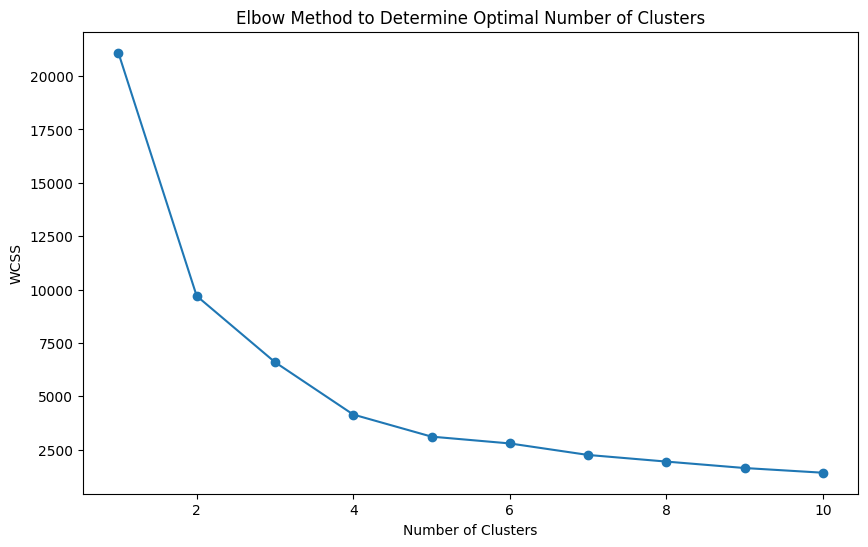

Cluster Summary (Mean Values):
            tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        57.134537       91.568871   5223.116817
1        10.791692       62.579632    752.216109
2        44.410605       29.533990   1339.258906


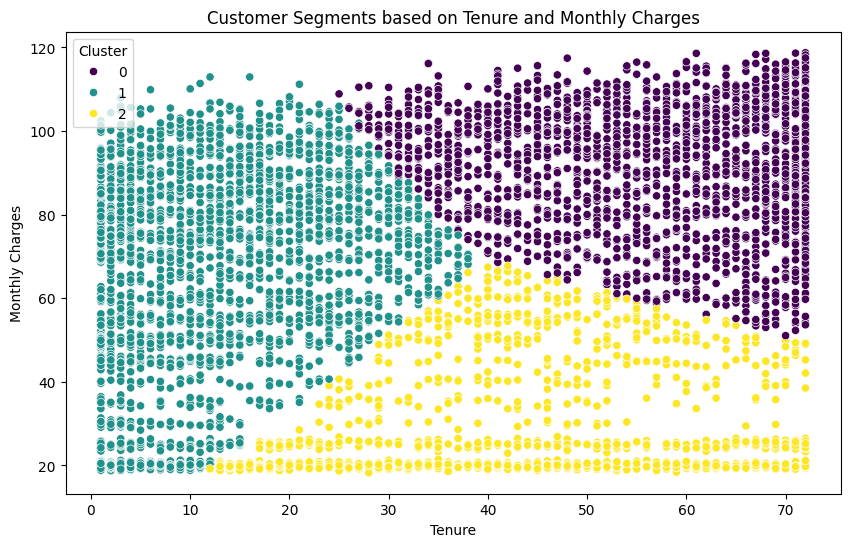

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Select numerical features relevant for customer segmentation
# Assuming 'tenure', 'MonthlyCharges', and 'TotalCharges' are our main features for segmentation
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Handle any missing or invalid values in TotalCharges by converting them to numeric and dropping NaNs
mydata['TotalCharges'] = pd.to_numeric(mydata['TotalCharges'], errors='coerce')
mydata = mydata.dropna(subset=numerical_features)

# Extract the numerical features for clustering
X = mydata[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):  # Test clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose an appropriate number of clusters based on the elbow plot, as 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
mydata['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters by looking at the mean values of each feature per cluster
cluster_summary = mydata.groupby('Cluster')[numerical_features].mean()
print("Cluster Summary (Mean Values):")
print(cluster_summary)

# Visualize clusters in 2D plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mydata['tenure'], y=mydata['MonthlyCharges'], hue=mydata['Cluster'], palette='viridis')
plt.title('Customer Segments based on Tenure and Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Cluster')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

mydata = pd.read_csv( "/content/drive/MyDrive/Colab Notebooks/database/Telecom_customer.csv" )


# Select numerical features relevant for customer segmentation
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Handle missing values in TotalCharges
mydata['TotalCharges'] = pd.to_numeric(mydata['TotalCharges'], errors='coerce')
mydata = mydata.dropna(subset=numerical_features)

# Extract the numerical features for clustering
X = mydata[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method (as discussed previously)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
mydata['Cluster'] = kmeans.fit_predict(X_scaled)

# Convert 'Churn' to binary (0 for 'No' and 1 for 'Yes') for calculating churn rates
mydata['Churn'] = mydata['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate churn rate within each cluster
churn_analysis = mydata.groupby('Cluster')['Churn'].mean() * 100  # Multiply by 100 to get percentage

# Display churn rate per cluster
print("Churn Rate by Cluster (%)")
print(churn_analysis)

# Optional: Display summary statistics for each cluster, including churn rates and feature averages
cluster_summary = mydata.groupby('Cluster').agg({
    'tenure': 'mean',
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean',
    'Churn': 'mean'
}).rename(columns={'Churn': 'Churn Rate'}).sort_values(by='Churn Rate', ascending=False)

# Convert churn rate to percentage for readability
cluster_summary['Churn Rate'] *= 100

print("\nCluster Summary with Churn Rate (%) and Feature Averages:")
print(cluster_summary)
print(mydata['Churn'].value_counts())


Churn Rate by Cluster (%)
Cluster
0    16.704289
1    42.438733
2     5.370496
Name: Churn, dtype: float64

Cluster Summary with Churn Rate (%) and Feature Averages:
            tenure  MonthlyCharges  TotalCharges  Churn Rate
Cluster                                                     
1        10.791692       62.579632    752.216109   42.438733
0        57.134537       91.568871   5223.116817   16.704289
2        44.410605       29.533990   1339.258906    5.370496
Churn
0    5163
1    1869
Name: count, dtype: int64


**K-Means** clustering identified 3 distinct customer groups. Cluster 1 represents long-term, low-spending customers with minimal churn risk, while Cluster 3 consists of high-spending, short-tenure customers with a churn rate of 45%, suggesting a need for targeted retention strategies.



---


**Actionable insights gained from the analysis:** High churn rates among short-tenure customers suggest the need for onboarding programs and loyalty incentives. Additionally, segmentation reveals that targeting high-spending customers with personalized offers can significantly improve retention.